<a href="https://colab.research.google.com/github/codybaraks/Financial-Inclusion/blob/master/Financial_Inclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# FINANCIAL INCLUSION

# Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
# Find and deal with outliers, anomalies, and missing data within the dataset.
# Plot univariate and bivariate summaries recording your observations.
# Implement the solution by performing the respective analysis i.e. reduction, modeling, etc.
# Challenge your solution by providing insights on how you can make improvements.



 Defining the Question

##**a) Defining the Question**

Figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the 

state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might 

drive individuals’ financial outcomes.

## b) Specifying the Data Analytic Question

Find and deal with outliers, anomalies, and missing data within the dataset.

## **c) Defining the Metric for Success**

Plot univariate and bivariate summaries recording your observations.

### Data Relevance

In [0]:
# This is where all my imports are

# All imports

# Importing Numpy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns

##Reading the dataset


In [5]:
# Reading the dataset

finance = pd.read_csv("http://bit.ly/FinancialDataset")
finance.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


### Checking the data

In [6]:
# Checking the number of or records in the dataset

finance.shape

(23524, 13)

In [7]:
# Checking the top of the dataset

finance.head(4)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private


In [8]:
# Checking the bottom of the dataset
finance.tail(4)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [9]:
# Checking to see if the data has appropriate data 
finance.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## Tidying the Dataset

In [10]:
# Renaming the columns
# finance.head(1)
fn = finance.rename(columns={"Type of Location":"location_type","Respondent Age":"age_of_respondent","The relathip with head":"relationship_with_head","Level of Educuation":"education_level","Type of Job":"job_type"})
fn.head(1)

fina = finance.rename(columns={"Type of Location":"location_type","Cell Phone Access":"cellphone_access","Respondent Age":"age_of_respondent","The relathip with head":"relationship_with_head","Level of Educuation":"education_level","Type of Job":"job_type"})

# fn = fn.rename({"Cell Phone Access":"cellphone_access"}, axis=1, inplace=True)
# fn = fn.rename(columns={'Cell Phone Access':'cellphone_access'}, axis=1, inplace=True)
fina.head()

,country,year,uniqueid,Has a Bank account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [11]:
# Check for null values
fina.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
location_type             15
cellphone_access          11
household_size            28
age_of_respondent         34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
education_level           29
job_type                  30
dtype: int64

In [12]:
# Find no of null values
fina.dropna().head(2)

,country,year,uniqueid,Has a Bank account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


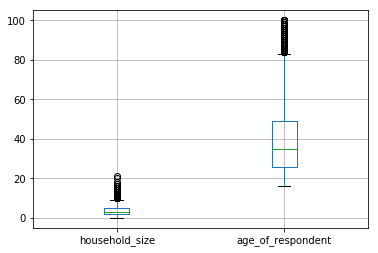

In [13]:
# Check for outliers
# boxplot = df.boxplot(grid=False, rot=45, fontsize=15)
boxplot = fina.boxplot(["household_size","age_of_respondent"]) 

plt.show()

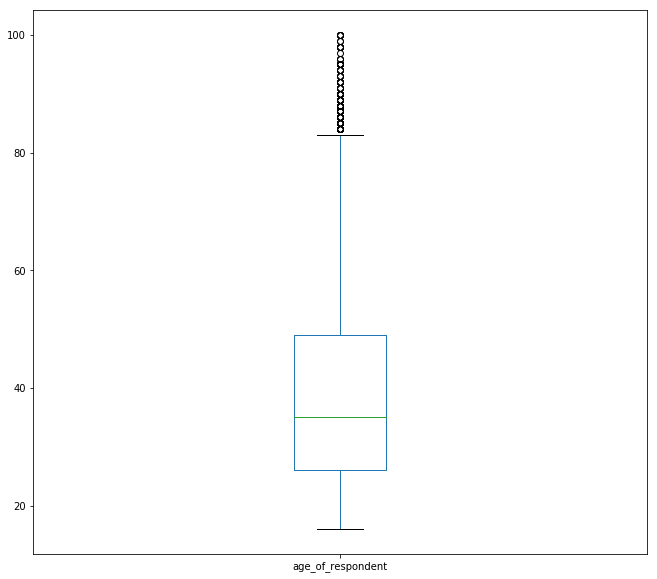

In [14]:
# Anomalies detected in respondent age
fina[['age_of_respondent']].plot(kind='box',figsize=(11,10))

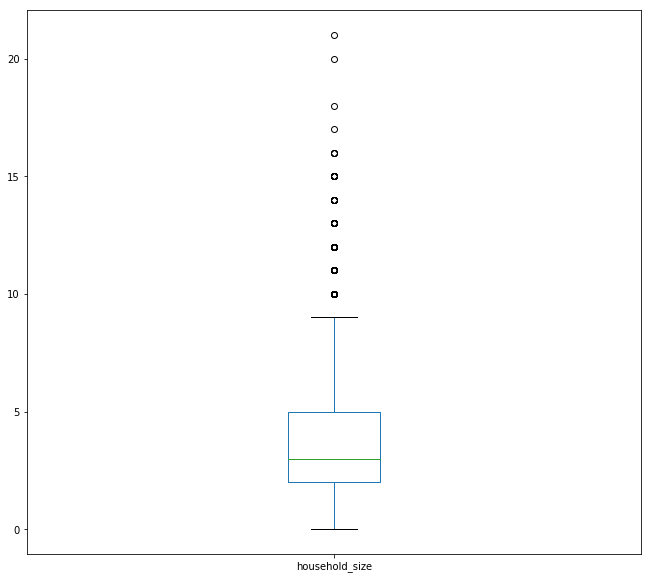

In [15]:
# Anomalies detected in household_size age
fina[['household_size']].plot(kind='box',figsize=(11,10))

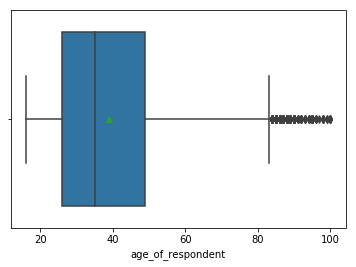

In [39]:
# Creating a boxplot of age_of_respondent
##
sns.boxplot(fina["age_of_respondent"], showmeans=True)


In [16]:
fina.head(1)

,country,year,uniqueid,Has a Bank account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed


#Plotting univariate and bivariate summaries

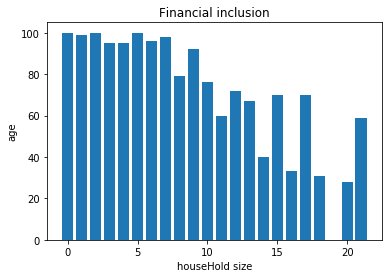

In [21]:
# Plot univariate and bivariate summaries recording your observations.
x = fina['household_size']
age = fina["age_of_respondent"]  

plt.bar(x, age)
plt.ylabel("age")
plt.xlabel("houseHold size")
plt.title("Financial inclusion")
plt.show()

In [18]:
fina["education_level"].isnull().sum()


29

In [0]:
# Replacing the null values with the mode
cols = ["country","household_size","gender_of_respondent","marital_status","location_type","Has a Bank account","cellphone_access","age_of_respondent","relationship_with_head","education_level","job_type"]
fina[cols] = fina[cols].fillna(fina.mode().iloc[0])

In [31]:
# Confirming that the null values have been replaced by the mode
p = fina.isna().sum()
p

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [34]:
# Check the correlation between the AGE AND HOUSEHOLD-SIZE
##

fina["age_of_respondent"].corr(fina["household_size"])

-0.1192115221214652

In [37]:
# Like carrying out central tendancy
##

fina.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.979000,3.679816,38.791575
std,0.899669,2.279314,16.511441
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


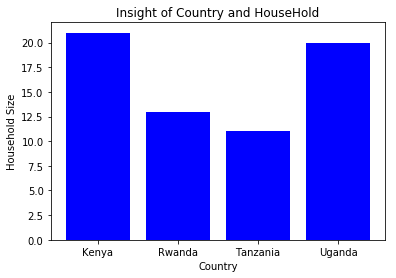

In [40]:
# seeing the relation of countries and the household_size


# Defining our data
country = fina['country']
house =  fina["household_size"]
 

plt.bar(country, house, color='blue')

# Labelling our x axis
plt.xlabel("Country")

# Labelling our y axis
plt.ylabel("Household Size")

# Giving a title to our Bar chart
plt.title("Insight of Country and HouseHold")

# Displaying our chart
plt.show()

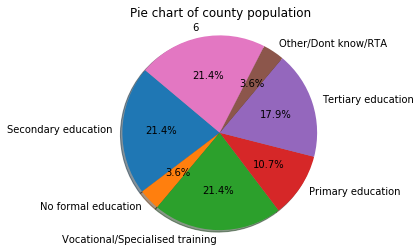

In [58]:


gender = fina["household_size"].sample(7)
edu = fina["education_level"].unique().tolist()




plt.pie(gender, autopct ='%1.1f%%',shadow = True, startangle = 140, labels=edu)
plt.axis('equal')
plt.title('Pie chart of county population')
plt.show()

In [46]:
edu.unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

In [43]:
gender.sample(10)

4797     3.0
15196    1.0
13072    5.0
21419    2.0
1584     5.0
2291     6.0
14365    4.0
4840     3.0
937      3.0
16340    2.0
Name: household_size, dtype: float64